# Workshop: Glitch Art in Python 

Pardon the mess, this collating a collection a notes from years ago.

wishing you well and have funnnn

I like using jupyter notebooks for exploration, and then scripts if need more consistent tooling.

## Setup
### Environment setup

choose your preferred python env setup.  conda, uv, etc.

in case you're new! https://www.python.org/about/gettingstarted/

I typically VisualStudio code as my editor, and I use virtual environments in case i need to manage different package dependencies.

We will be using the following libraries.
- https://pypi.org/project/pillow/
- https://numpy.org/
- https://matplotlib.org/

you can run the following command

```
pip install -r requirements.txt
```

In [1]:
# loading, processing, and writing images
from PIL import Image

# Numpy for math operations
import numpy as np

# Matplotlib for plotting
from matplotlib import pyplot as plt

# some time libraries to help annotate files
import time
from datetime import date

### loading an image ...
we will start by loading and viewing the image we want to play with

I'll be using one of my favorite pieces from Kehinde Wiley

 https://www.famsf.org/exhibitions/kehinde-wiley-an-archaeology-of-silence

Image dimensions:  1342 757
Image info, meta data, and data {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1), 'progressive': 1, 'progression': 1, 'icc_profile': b'\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03

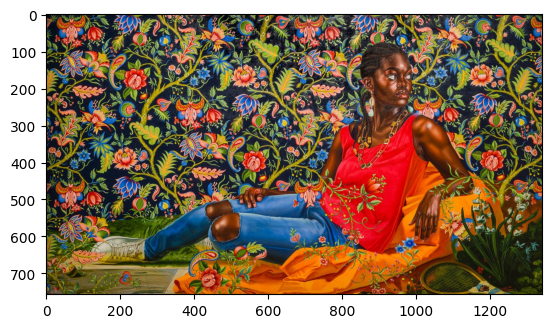

In [2]:
fname_img = 'input_images/example.jpg'
im = Image.open(fname_img, 'r')
width, height = im.size

pixel_values = np.asarray(im)
print("Image dimensions: ", width, height)
print("Image info, meta data, and data", im.info)
im_new = Image.fromarray(pixel_values)
plt.imshow(im_new)
plt.show()

### Some helper functions

We will be doing alot of loading and plotting the images, so here are some helper functions

In [3]:
# Given the file path, return an array of the values of the pixels
def fname_to_array(fname):
    im = Image.open(fname, 'r')
    width, height = im.size
    pixel_values = np.asarray(im)
    return pixel_values


# Given the an array of pixels, save it as a png to view
def array_to_img(pixel_array, target_fname=None):
    im_new = Image.fromarray(pixel_array.astype(np.uint8))
    plt.imshow(im_new)
    if not target_fname:
        target_fname = f'{date.today()}_{time.time():.0f}_img_sandbox.png'
    plt.axis('off')
    plt.savefig(target_fname, dpi=300, bbox_inches='tight', pad_inches=0)
    print(f"Saved to: {target_fname}")
    plt.show()

# Given an array, plot as a python plot
def plot_array_rgb(pixel_array):
    im_new = Image.fromarray(pixel_array.astype(np.uint8))
    plt.imshow(im_new)
    plt.show()

## Understanding the data format ....

To build up intuition, we will start with interpreting as images as matrices of RGB values.  Adding these primaries togehter in a display forms the human perception of different light and color.

https://en.wikipedia.org/wiki/RGB_color_model

This data is stored in a X x Y x 3 dimension matrix where
- X: width, left to right
- Y: height, a top down convention
- and then 3 color channels.

Each pixel will have a value from (0, 255) to describe the brightness of that color channel

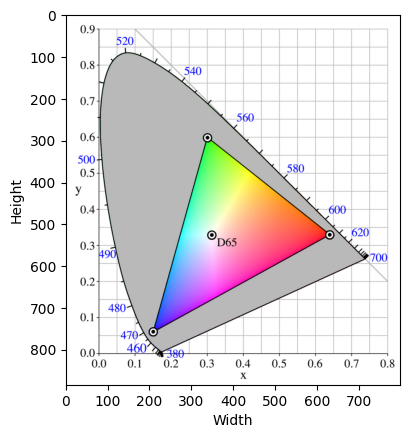

Shape of the array: X, Y, 3 (884, 800, 3)
Example of a single pixel value, with all three RGB components:  [255 255 255]


In [4]:
# for fun, let's load an image showing the RGB format on top of the CIE chromaticity diagram
pixel_array = fname_to_array('input_images/cie.png')

plt.ylabel('Height')
plt.xlabel('Width')
plot_array_rgb(pixel_array)
print("Shape of the array: X, Y, 3", pixel_array.shape)


print("Example of a single pixel value, with all three RGB components: ", pixel_array[0][0])

### playing with data ..

now that we know that, we can play around with the individual RGB values in the image

I'll be using pretty unoptimized code to provide talk through what's happening. 

In [5]:
# play around with the color channels
def color_overwrite(pixel_array):
    # Grab the width and height of the iage
    width, height, _ = pixel_array.shape
    new_pixel_array = np.empty(pixel_array.shape)
    # Loopsssss
    # loop over width
    for i in range(width):
        # loop over height
        for j in range(height):

            # grab a pixel
            r,g,b = pixel_array[i][j]

            # TODO HERE: play around with the RGB values!
            r = 0
            g = g
            b = b


            new_pixel_array[i][j] = [r, g, b]
            
    return new_pixel_array

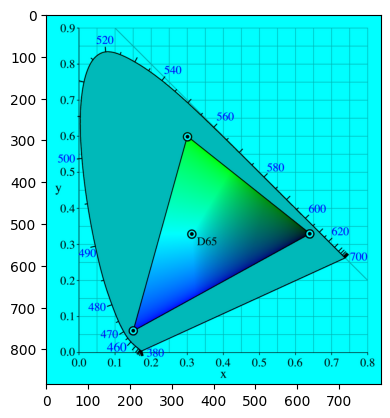

In [6]:
# Try the function out!
pixel_array = fname_to_array('input_images/cie.png')
new_array = color_overwrite(pixel_array)
plot_array_rgb(new_array)

## RGB to grayscale

Nice! now that we are playing with the image pixel by pixel, we can do other math on it, like turning it into gray scale values

In [7]:
# A long version...
def rgb2gray_forloops(pixel_array):
    width, height, _ = pixel_array.shape
    new_pixel_array = np.empty(pixel_array.shape)
    for i in range(width):
        for j in range(height):
            r,g,b = pixel_array[i][j]
            # "Luminance" ... https://en.wikipedia.org/wiki/Relative_luminance
     
            brightness = (0.2126*r + 0.7152*g + 0.0722*b)  

            # To keep in same RGB format for ease of plot, let's write the exact values into the same shape
            new_pixel_array[i][j] = [brightness, brightness, brightness]
            
    return new_pixel_array

# Faster version using built in math libraries
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
# CAUTION: returns a X x Y x 1 D array. only 1 channel describing the brightness
# note there's a couple formulas for this https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2126, 0.7152, 0.0722])

Time 0.0209s


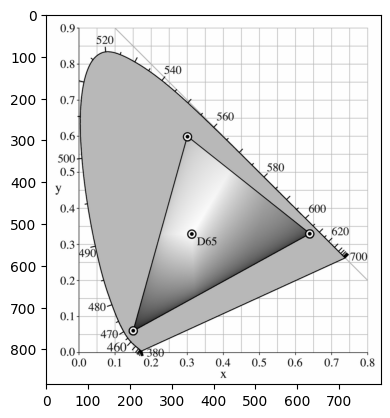

In [8]:
# Try gray scale functions!
# Load image
pixel_array = fname_to_array('input_images/cie.png')

# slow version, timing it
if False:
    start_time = time.time()
    new_array = rgb2gray_forloops(pixel_array)
    print(f"Time {time.time()-start_time:.4f}s")
    plot_array_rgb(new_array)


# using Numpy
start_time = time.time()
grey_array = rgb2gray(pixel_array)
print(f"Time {time.time()-start_time:.4f}s")
# Ugly trick:  we got a X x Y x 1 array, so stack them so we can use the same plotting functions
new_array = np.stack([grey_array, grey_array, grey_array], axis=2)
plot_array_rgb(new_array)

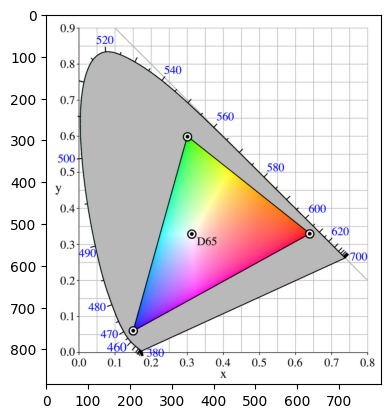

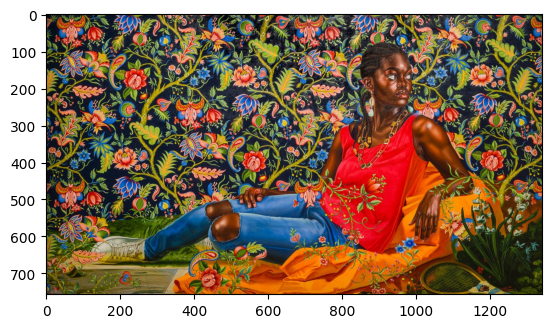

input_images/cie.png
Max luma: 254.99999999999997
 Min luma: 0.0
input_images/example.jpg
Max luma: 252.47299999999996
 Min luma: 0.0


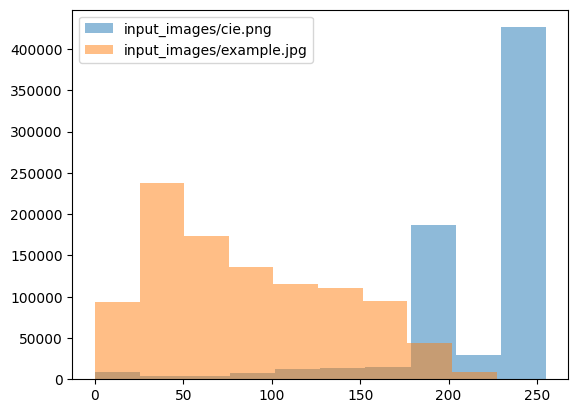

In [9]:
# And can visualize the distribution of brightness
image_files=['input_images/cie.png', 'input_images/example.jpg']

# Just for reference, show images again
for file in image_files:
    pixel_array = fname_to_array(file)
    plot_array_rgb(pixel_array)


for file in image_files:
    print(file)
    pixel_array = fname_to_array(file)
    grey_array = rgb2gray(pixel_array)
    print(f"Max luma: {np.max(grey_array)}\n Min luma: {np.min(grey_array)}")
    plt.hist(grey_array.flatten(), alpha=0.5, label=file)

plt.legend()
plt.show()


#  Cool! Let's do a bit of sandboxing now

Now that we have some understanding of how the data is formatted, we can start breaking things :)

Below I included some images processing functions, but make sure to edit and build your own! Break things and build them back up!

Then mash them together to get fun effects.

## a sampler to whet your palate 

Modifying pixels:
- add_noise(..): Add salt and pepper noise 
- rgb_mask_passthrough(..): pass through pixels if they're bright enough
- rgb_masked_bicolor(..): stencil effect based off brightness

Array accessing:
- rotate_rows(..), rotate_columns(..): roll over rows/columns of the image for a bar effect
- sort_image(..): sort pixels in the image by brightness

Combining effects/images
- mix_images(..): average of two image arrays
- bash_images(..): insert random blocks of one image to another

In [10]:
# Noise!
# https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
def add_noise(pixel_array, var=50):
    row,col,ch= pixel_array.shape
    mean = 0
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = pixel_array + gauss
    return noisy

# Mask out pixels if the average luma is bright enough
def rgb_mask_passthrough(pixel_array, threshold=100):
    width, height, _ = pixel_array.shape
    new_pixel_array = np.empty(pixel_array.shape)
    for i in range(width):
        for j in range(height):
            r,g,b = pixel_array[i][j]
            brightness = (0.2126*r + 0.7152*g + 0.0722*b)  
            if brightness > threshold:
                new_pixel_array[i][j] = [r,g,b]
            else:
                #new_pixel_array[i][j] = [0, 0, 0]
                new_pixel_array[i][j] = [0,0,0]
                
    return new_pixel_array


# Change colors depending on the brightness 
def rgb_masked_bicolor(pixel_array, threshold=120, color1=[255,255,255], color2=[0,0,0]):
    width, height, _ = pixel_array.shape
    new_pixel_array = np.empty(pixel_array.shape)
    for i in range(width):
        for j in range(height):
            r,g,b = pixel_array[i][j]
            brightness = (0.2126*r + 0.7152*g + 0.0722*b)  
            if brightness > threshold:
                new_pixel_array[i][j] = color1
            else:
                new_pixel_array[i][j] = color2
            
    return new_pixel_array


# How about some array operations.  Like rolling over values in the array
def rotate_rows(pixel_array):
    height, width, _ = pixel_array.shape
    new_pixel_array = np.empty(pixel_array.shape)
    
    for i in range(height):
        if  10 < i%100 - 15 < 80:
            continue
        new_pixel_array[i] = np.roll(pixel_array[i], 200)
    return new_pixel_array

# Reshaped and rotated (originally buggy code turned into an effect)
def reshape_rotate_rows(pixel_array):
    width, height, _ = pixel_array.shape
    new_pixel_array = rotate_rows(pixel_array.reshape(height, width, _))
    return new_pixel_array.reshape(width, height, _)

# rotated colunns 
def rotate_columns(pixel_array):
    height, width, _ = pixel_array.shape
    new_pixel_array = np.empty(pixel_array.shape)
    
    for i in range(width):
        if  10 < i%100 - 15 < 80:
            continue
        new_pixel_array[:,i,:] = np.roll(pixel_array[:,i,:], 200)
    return new_pixel_array


# or how about literally sorting the image?
def sort_image(pixel_array):
    return np.sort(pixel_array, axis=1)


# We can mix effects together by taking averages
def mix_images(pixel_array1, pixel_array2):
    return pixel_array1 * 0.5 + pixel_array2 * 0.5


# How about bashing two images together?
# Randomly place <n_mosaic> number of blocks
# of size <block_size> 
# from array1 into array2
def bash_images(pixel_array1, pixel_array2, n_mosaics=10, block_size=100):
    # Ensure images are the same size
    width1, height1, _ = pixel_array1.shape
    width2, height2, _ = pixel_array2.shape
    width, height = min(width1, width2), min(height1, height2)

    new_pixel_array = np.copy(pixel_array2[:width,:height,:])


    # Create n_mosaic number of random indices to assign array1 into array2
    for _ in range(n_mosaics):
        x0 = np.random.randint(0, width-1)
        y0 = np.random.randint(0, height-1)
        
        block_x = np.random.randint(0, block_size-1)
        block_y = np.random.randint(0, block_size-1)
        
        x1 = min(x0 + block_x, width-1)
        y1 = min(y0 + block_y, height-1)


        new_pixel_array[x0:x1, y0:y1, :] = np.copy(pixel_array1[x0:x1, y0:y1, :])

    return new_pixel_array



## create your own!

what does it do?...
- (describe here)

In [11]:
# TODO: Do whatever you want lol
def whatchamacallit(pixel_array):
    # something happens?
    return pixel_array

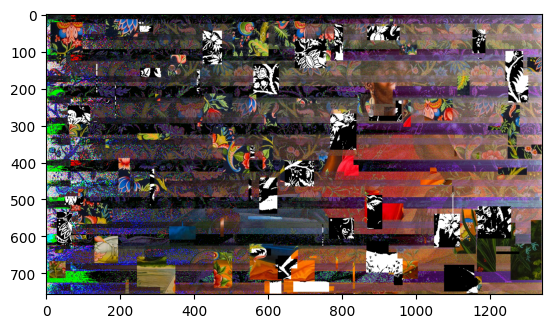

Saved to: output_images/image_processing_demo.png


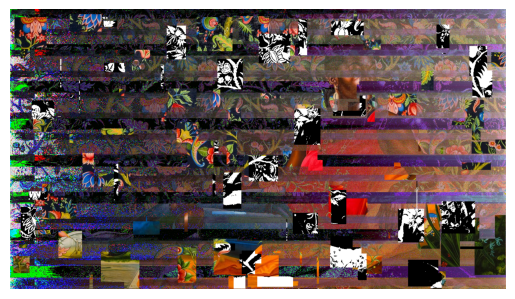

In [12]:
# Mash together effects!
pixel_array = fname_to_array('input_images/example.jpg')

pixel_array = add_noise(pixel_array, var=2000)

pixel_array = rgb_mask_passthrough(pixel_array, 100)

pixel_array = rotate_rows(pixel_array)

bicolor = rgb_masked_bicolor(pixel_array, threshold=90, color1=[0, 0, 125], color2= [5, 20, 0])

sorted_array = sort_image(pixel_array)

mixed = mix_images(bicolor, sorted_array)
mixed = mix_images(mixed, sorted_array)
pixel_array = mix_images(mixed, pixel_array)

rot_col_array = reshape_rotate_rows(pixel_array)
pixel_array = mix_images(rot_col_array, pixel_array)

pixel_array = mix_images(mixed, pixel_array)

original_image =  fname_to_array('input_images/example.jpg')
stenciled_array = rgb_masked_bicolor(original_image, threshold=100)

pixel_array = bash_images(original_image, pixel_array , n_mosaics=100)
pixel_array = bash_images(stenciled_array, pixel_array, n_mosaics=50)


# Plot!
plot_array_rgb(pixel_array)

# Save!
array_to_img(pixel_array, target_fname='output_images/image_processing_demo.png')


# thankss
thanks for playing around with this notebook, let me know if you have feedback or want to see more of this!

next sessions could talk about 
- some more complex rendering-inspired techniques 
- applying glitches in video